In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer,SimpleImputer

In [2]:
df = pd.read_csv("wine_data.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 16 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Unnamed: 0            100000 non-null  int64  
 1   fixed_acidity         99000 non-null   float64
 2   volatile_acidity      99000 non-null   float64
 3   citric_acid           100000 non-null  float64
 4   residual_sugar        100000 non-null  float64
 5   chlorides             100000 non-null  float64
 6   free_sulfur_dioxide   100000 non-null  float64
 7   total_sulfur_dioxide  100000 non-null  float64
 8   density               100000 non-null  float64
 9   pH                    100000 non-null  float64
 10  sulphates             100000 non-null  float64
 11  color                 99000 non-null   object 
 12  region                99000 non-null   object 
 13  grape_variety         100000 non-null  object 
 14  vintage_year          100000 non-null  int64  
 15  q

(array([17854., 18332., 18414., 18270., 18454.,  5406.,   577.,   617.,
          598.,   478.]),
 array([ 4.00006644,  6.27458013,  8.54909382, 10.82360751, 13.0981212 ,
        15.37263489, 17.64714858, 19.92166227, 22.19617596, 24.47068965,
        26.74520334]),
 <BarContainer object of 10 artists>)

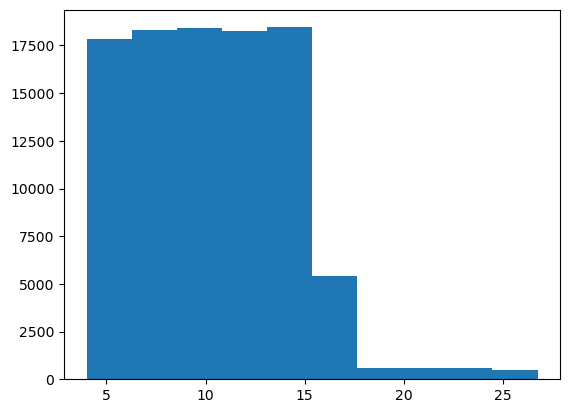

In [4]:
plt.hist(data= df,x="fixed_acidity")

(array([16787., 16955., 17132., 17053., 17133., 11896.,   501.,   538.,
          505.,   500.]),
 array([0.10000669, 0.34634248, 0.59267828, 0.83901407, 1.08534987,
        1.33168566, 1.57802145, 1.82435725, 2.07069304, 2.31702883,
        2.56336463]),
 <BarContainer object of 10 artists>)

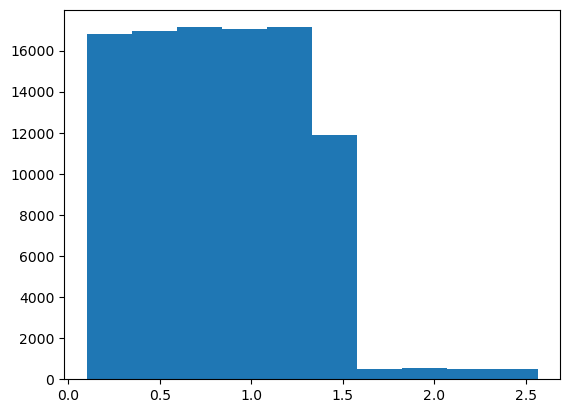

In [5]:
plt.hist(data= df,x="volatile_acidity")

In [6]:
df.sample(25)

,Unnamed: 0,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,color,region,grape_variety,vintage_year,quality
13495,13507,14.671480,1.248188,0.993083,4.873207,0.400827,26.328473,17.787365,0.990130,2.920116,1.419152,WHITE,Bordeaux,Cabernet Sauvignon,2019,medium
90853,91695,12.913983,1.104236,0.683677,6.364595,0.319838,7.002127,94.935113,1.003749,2.998672,1.610270,red,Bordeaux,Cabernet Sauvignon,2020,medium
28961,29040,6.729287,0.525237,0.820698,8.397191,0.391575,27.877013,280.256642,0.998721,3.099158,1.943751,red,Tuscany,Pinot Noir,2015,medium
29250,29331,10.945078,0.404087,0.946172,1.590377,0.093297,19.056734,43.341845,1.000285,2.955893,0.531718,White,napa,Chardonnay,2015,medium
99914,100912,9.276054,0.744568,0.870694,5.996384,0.354072,66.576778,14.728779,0.992132,3.683467,1.409106,WHITE,Bordeaux,Merlot,2016,medium
54597,54889,10.244467,0.295734,0.457876,4.845265,0.277583,22.873767,184.768643,0.999941,2.906498,0.872079,White,Napa Valley,Chardonnay,2019,medium
41216,41388,10.032553,0.814499,0.909923,7.729095,0.450160,25.228760,91.415478,1.000177,3.210094,0.898650,white,Bordeaux,Merlot,2020,medium
67166,67626,10.692290,1.157636,0.176971,3.436783,0.036970,61.392040,180.063261,1.004615,3.575932,1.856878,Red,Napa Valley,cabernet,2017,medium
69486,69974,9.456401,0.163194,0.487826,5.436619,0.172897,43.137372,33.908794,0.998365,3.931265,0.562333,White,Napa Valley,Cabernet Sauvignon,2020,medium
79056,79695,15.903345,0.866399,0.986711,11.064283,0.193347,41.098580,126.743087,0.997857,3.773163,0.702310,white,Bordeaux,Cabernet Sauvignon,2020,low


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 16 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Unnamed: 0            100000 non-null  int64  
 1   fixed_acidity         99000 non-null   float64
 2   volatile_acidity      99000 non-null   float64
 3   citric_acid           100000 non-null  float64
 4   residual_sugar        100000 non-null  float64
 5   chlorides             100000 non-null  float64
 6   free_sulfur_dioxide   100000 non-null  float64
 7   total_sulfur_dioxide  100000 non-null  float64
 8   density               100000 non-null  float64
 9   pH                    100000 non-null  float64
 10  sulphates             100000 non-null  float64
 11  color                 99000 non-null   object 
 12  region                99000 non-null   object 
 13  grape_variety         100000 non-null  object 
 14  vintage_year          100000 non-null  int64  
 15  q

## checking null values


In [7]:
df.isnull().sum()

Unnamed: 0                 0
fixed_acidity           1000
volatile_acidity        1000
citric_acid                0
residual_sugar             0
chlorides                  0
free_sulfur_dioxide        0
total_sulfur_dioxide       0
density                    0
pH                         0
sulphates                  0
color                   1000
region                  1000
grape_variety              0
vintage_year               0
quality                    0
dtype: int64

## Handling Numeric null Values

In [8]:
numeric_null = df[["fixed_acidity","volatile_acidity"]]
numeric_null

,fixed_acidity,volatile_acidity
0,9.545971,1.119034
1,10.507966,0.432228
2,7.353309,1.073555
3,4.632620,0.520863
4,4.971561,0.703143
...,...,...
99995,7.232601,0.608386
99996,5.129761,0.359503
99997,13.127022,0.175020
99998,13.377078,0.726480


## filling numerical null values

In [9]:
imputer = KNNImputer(n_neighbors=3, weights='distance')


a = imputer.fit_transform(numeric_null)
df1 = pd.DataFrame(a,columns=numeric_null.columns)

<Axes: ylabel='Frequency'>

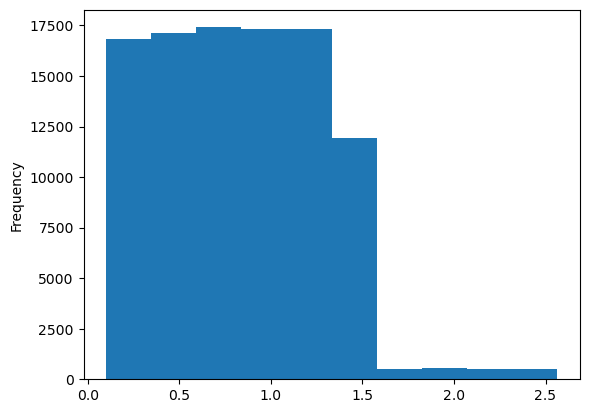

In [10]:
pd.DataFrame(a,columns=numeric_null.columns)['volatile_acidity'].plot(kind='hist')

In [11]:
df["fixed_acidity"] = df1["fixed_acidity"]

In [12]:
df['volatile_acidity']  = df1["volatile_acidity"]

## cheking Categorical columns


In [13]:
df["region"].unique()

array(['Bordeaux', 'Rioja', 'Tuscany', 'Napa Valley', 'napa', 'bordeaux',
       nan], dtype=object)

<Axes: xlabel='region'>

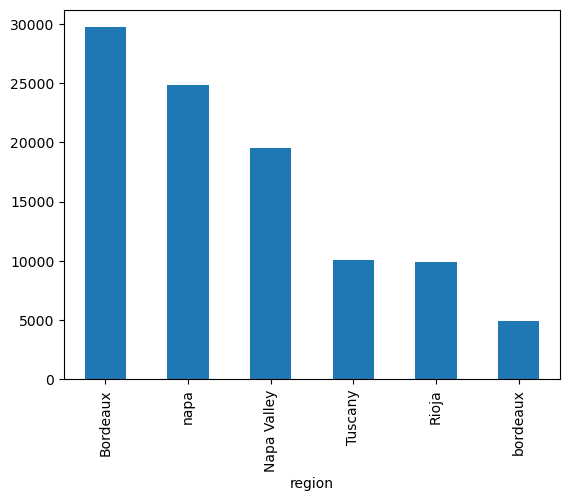

In [14]:
df["region"].value_counts().plot(kind="bar")

In [15]:
df["region"] = df["region"].str.strip().str.title()

df["region"] = df["region"].replace({
    "Napa Valley" : "Napa"
})

<Axes: xlabel='region'>

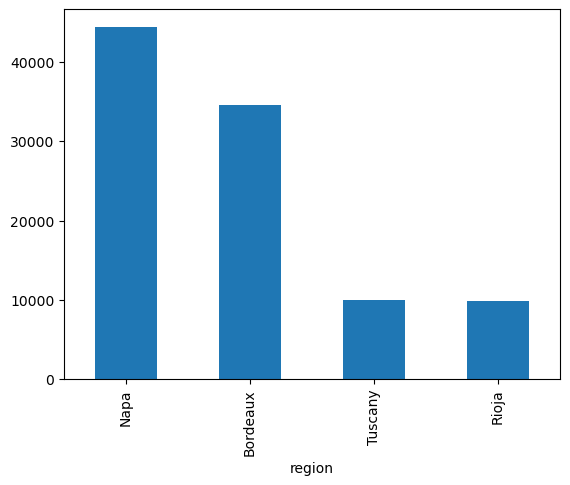

In [16]:
df["region"].value_counts().plot(kind="bar")

In [17]:
df["region"].unique()

array(['Bordeaux', 'Rioja', 'Tuscany', 'Napa', nan], dtype=object)

In [18]:
df["color"].unique()

array(['red', 'White', 'Red', nan, 'white', 'RED', 'WHITE'], dtype=object)

In [19]:
df["color"] = df["color"].str.strip().str.title()

In [20]:
df["color"].unique()

array(['Red', 'White', nan], dtype=object)

## filling categorical null values

In [21]:
categorical_null = ["region","color"]

for i in categorical_null:
    mo = df[i].mode()[0]
    df[i].fillna(mo,inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_18896\4245690355.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[i].fillna(mo,inplace=True)


<Axes: xlabel='region'>

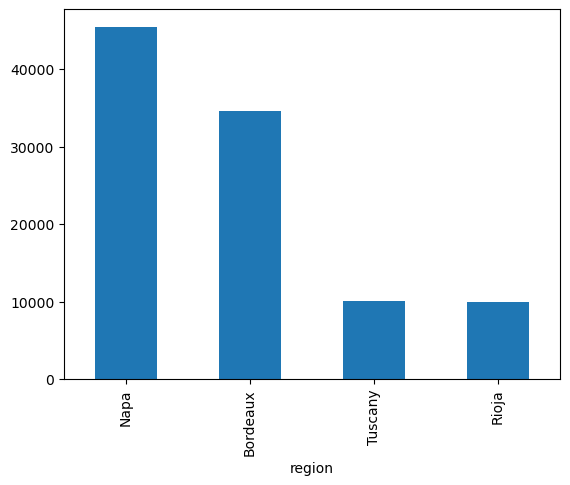

In [22]:
df["region"].value_counts().plot(kind="bar")

In [23]:
df["region"].unique()

array(['Bordeaux', 'Rioja', 'Tuscany', 'Napa'], dtype=object)

<Axes: xlabel='color'>

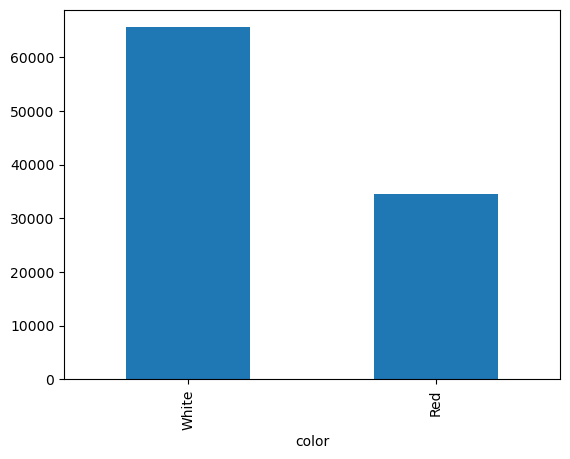

In [24]:
df["color"].value_counts().plot(kind="bar")

In [25]:
df.isnull().sum()

Unnamed: 0              0
fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
color                   0
region                  0
grape_variety           0
vintage_year            0
quality                 0
dtype: int64

In [29]:
df.duplicated().sum()

0

In [30]:
df.drop_duplicates(inplace=True)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 16 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Unnamed: 0            100000 non-null  int64  
 1   fixed_acidity         100000 non-null  float64
 2   volatile_acidity      100000 non-null  float64
 3   citric_acid           100000 non-null  float64
 4   residual_sugar        100000 non-null  float64
 5   chlorides             100000 non-null  float64
 6   free_sulfur_dioxide   100000 non-null  float64
 7   total_sulfur_dioxide  100000 non-null  float64
 8   density               100000 non-null  float64
 9   pH                    100000 non-null  float64
 10  sulphates             100000 non-null  float64
 11  color                 100000 non-null  object 
 12  region                100000 non-null  object 
 13  grape_variety         100000 non-null  object 
 14  vintage_year          100000 non-null  int64  
 15  q

## checking Outliers


In [26]:
df.describe()

,Unnamed: 0,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,vintage_year
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000
mean,50335.084910,10.329450,0.830446,0.500624,7.735087,0.305592,35.466844,153.139547,0.997499,3.402689,1.149587,2018.49898
std,29161.837117,3.880512,0.439444,0.288809,4.185040,0.170079,19.898792,84.830966,0.004325,0.347479,0.490196,1.80396
min,0.000000,4.000066,0.100007,0.000002,0.500032,0.010013,1.000036,6.006680,0.990000,2.800001,0.300004,2015.00000
25%,25060.750000,7.152321,0.463094,0.250300,4.110274,0.158098,18.307671,79.961608,0.993764,3.100370,0.724244,2017.00000
50%,50247.500000,10.201717,0.819971,0.501136,7.720419,0.306859,35.368715,152.746877,0.997486,3.405708,1.149186,2019.00000
75%,75579.250000,13.253994,1.174738,0.750442,11.366386,0.452292,52.691859,226.705151,1.001240,3.704201,1.572880,2020.00000
max,100999.000000,26.745203,2.563365,0.999979,14.999922,0.599999,69.999271,299.998509,1.005000,3.999991,1.999985,2020.00000


In [33]:
df.head()

,Unnamed: 0,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,color,region,grape_variety,vintage_year,quality
0,0,9.545971,1.119034,0.862154,0.845340,0.598128,9.182545,48.664670,0.992804,3.742508,0.406547,Red,Bordeaux,Pinot Noir,2020,low
1,1,10.507966,0.432228,0.494985,6.115509,0.140196,4.006026,67.476414,0.997109,3.720264,1.948616,Red,Rioja,Cabernet Sauvignon,2020,medium
2,2,7.353309,1.073555,0.879672,13.036667,0.284021,18.420530,240.854208,0.993566,2.969326,0.644075,White,Tuscany,Cabernet Sauvignon,2017,medium
3,3,4.632620,0.520863,0.997378,12.632835,0.165359,35.061987,244.025146,0.991359,3.449568,0.970601,Red,Napa,Cabernet Sauvignon,2020,high
4,4,4.971561,0.703143,0.511194,7.479528,0.058431,11.970373,253.486774,0.999933,3.241771,0.922057,White,Rioja,Merlot,2015,medium


hear unnamed column is nothing but working as index so we can drop that column

In [27]:
df = df.drop(columns=["Unnamed: 0"])

In [28]:
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,color,region,grape_variety,vintage_year,quality
0,9.545971,1.119034,0.862154,0.845340,0.598128,9.182545,48.664670,0.992804,3.742508,0.406547,Red,Bordeaux,Pinot Noir,2020,low
1,10.507966,0.432228,0.494985,6.115509,0.140196,4.006026,67.476414,0.997109,3.720264,1.948616,Red,Rioja,Cabernet Sauvignon,2020,medium
2,7.353309,1.073555,0.879672,13.036667,0.284021,18.420530,240.854208,0.993566,2.969326,0.644075,White,Tuscany,Cabernet Sauvignon,2017,medium
3,4.632620,0.520863,0.997378,12.632835,0.165359,35.061987,244.025146,0.991359,3.449568,0.970601,Red,Napa,Cabernet Sauvignon,2020,high
4,4.971561,0.703143,0.511194,7.479528,0.058431,11.970373,253.486774,0.999933,3.241771,0.922057,White,Rioja,Merlot,2015,medium


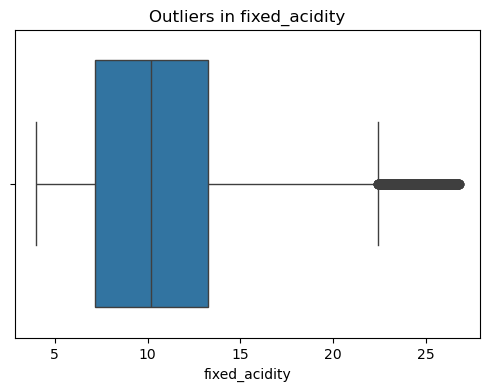

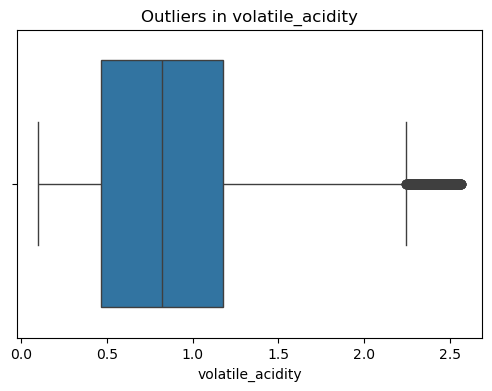

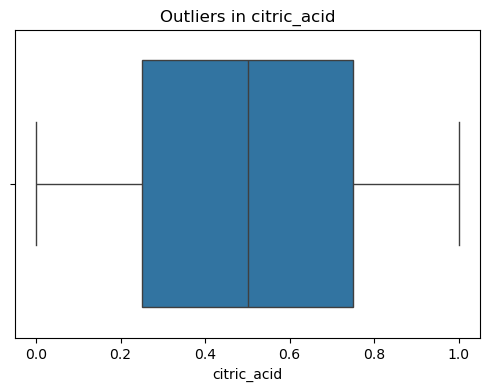

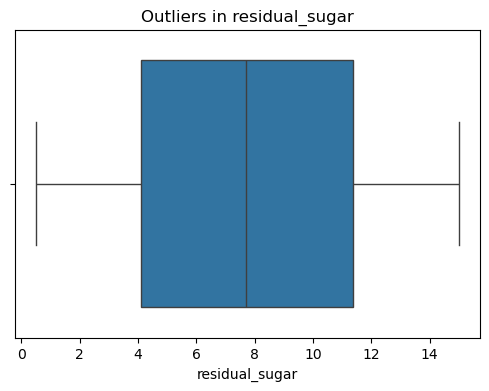

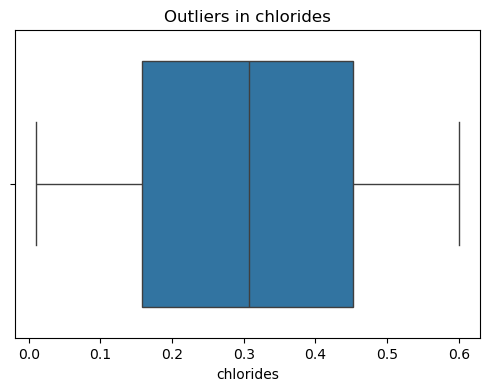

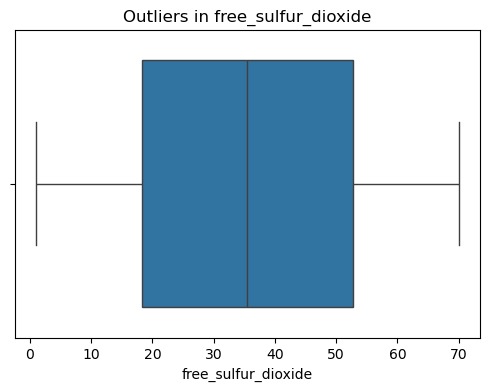

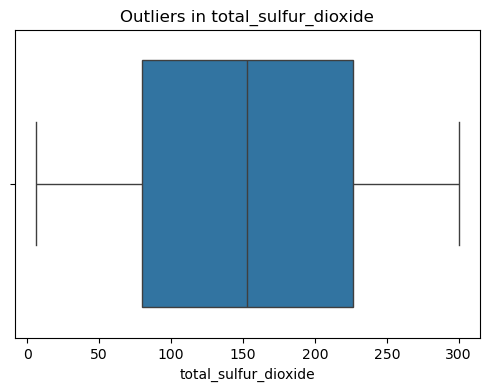

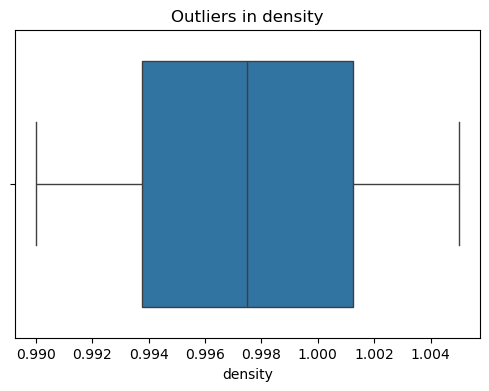

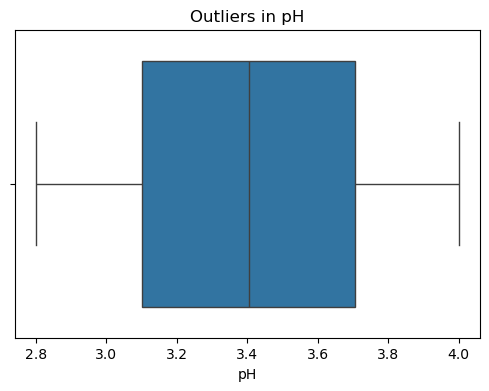

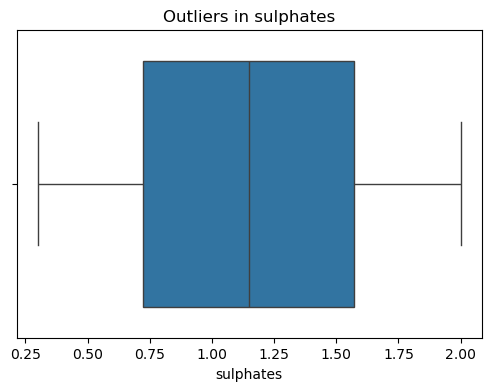

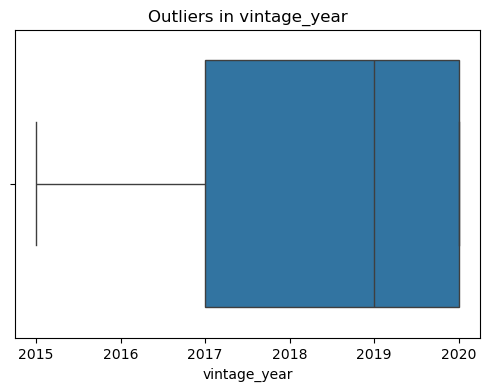

In [29]:
for col in df.select_dtypes(include='number').columns:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=df[col],)
    plt.title(f"Outliers in {col}")

    plt.show()


(array([17907., 18560., 18714., 18542., 18583.,  5415.,   580.,   621.,
          600.,   478.]),
 array([ 4.00006644,  6.27458013,  8.54909382, 10.82360751, 13.0981212 ,
        15.37263489, 17.64714858, 19.92166227, 22.19617596, 24.47068965,
        26.74520334]),
 <BarContainer object of 10 artists>)

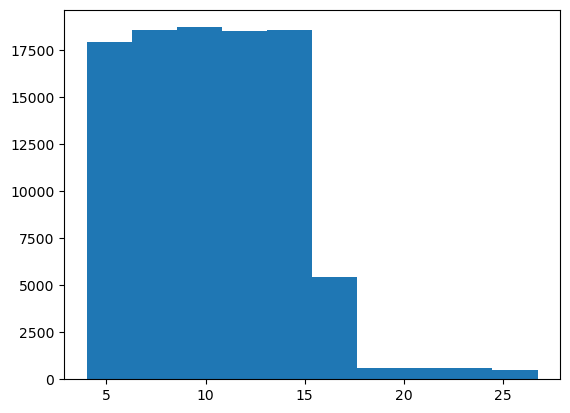

In [ ]:
plt.hist(data = df, x ="fixed_acidity")

(array([16824., 17148., 17409., 17314., 17320., 11930.,   505.,   542.,
          507.,   501.]),
 array([0.10000669, 0.34634248, 0.59267828, 0.83901407, 1.08534987,
        1.33168566, 1.57802145, 1.82435725, 2.07069304, 2.31702883,
        2.56336463]),
 <BarContainer object of 10 artists>)

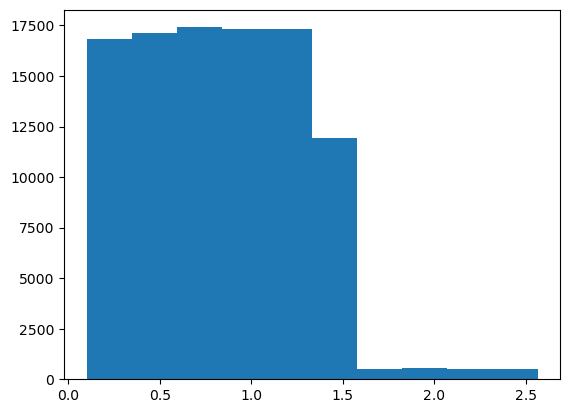

In [43]:
plt.hist(data = df, x ="volatile_acidity")

In [47]:
df.dtypes

fixed_acidity           float64
volatile_acidity        float64
citric_acid             float64
residual_sugar          float64
chlorides               float64
free_sulfur_dioxide     float64
total_sulfur_dioxide    float64
density                 float64
pH                      float64
sulphates               float64
color                    object
region                   object
grape_variety            object
vintage_year              int64
quality                  object
dtype: object

In [30]:
cats_Cols = ["color","region","grape_variety","quality"]

for cols in cats_Cols:
    
    print(cols,":" ,df[cols].unique())

color : ['Red' 'White']
region : ['Bordeaux' 'Rioja' 'Tuscany' 'Napa']
grape_variety : ['Pinot Noir' 'Cabernet Sauvignon' 'Merlot' 'Syrah' 'Chardonnay'
 'cabernet']
quality : ['low' 'medium' 'high']


In [55]:
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,color,region,grape_variety,vintage_year,quality
0,-0.107470,0.420241,0.862154,0.845340,0.598128,9.182545,48.664670,0.992804,3.742508,0.406547,Red,Bordeaux,Pinot Noir,2020,low
1,0.050191,-0.544856,0.494985,6.115509,0.140196,4.006026,67.476414,0.997109,3.720264,1.948616,Red,Rioja,Cabernet Sauvignon,2020,medium
2,-0.466824,0.356335,0.879672,13.036667,0.284021,18.420530,240.854208,0.993566,2.969326,0.644075,White,Tuscany,Cabernet Sauvignon,2017,medium
3,-0.912716,-0.420306,0.997378,12.632835,0.165359,35.061987,244.025146,0.991359,3.449568,0.970601,Red,Napa,Cabernet Sauvignon,2020,high
4,-0.857168,-0.164167,0.511194,7.479528,0.058431,11.970373,253.486774,0.999933,3.241771,0.922057,White,Rioja,Merlot,2015,medium


In [61]:
import warnings; warnings.filterwarnings("ignore")

In [53]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_absolute_error , mean_squared_error, r2_score

In [31]:
x = df.drop(columns=["quality"])
y = df["quality"]

In [34]:
y.unique()

array(['low', 'medium', 'high'], dtype=object)

In [35]:
y.head()

0       low
1    medium
2    medium
3      high
4    medium
Name: quality, dtype: object

In [36]:
from sklearn.model_selection import train_test_split

In [39]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)

In [48]:
numerical_cols = df.select_dtypes(exclude='object').columns
categorical_cols = df.select_dtypes(include="object").drop('quality',axis=1).columns

In [49]:
numerical_cols

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'vintage_year'],
      dtype='object')

In [50]:
categorical_cols

Index(['color', 'region', 'grape_variety'], dtype='object')

In [64]:
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

In [98]:
# build Processor
num_pipe = Pipeline(steps=[
    ("impute",KNNImputer(n_neighbors=3, weights='distance')),
    ("scale", RobustScaler())
])

ohe=OneHotEncoder(handle_unknown='ignore',sparse_output=False)


cat_pipe = Pipeline(steps=[
    ("impute",SimpleImputer(strategy="most_frequent")),
    ("encoder",ohe)    
])

preprocess = ColumnTransformer(
    transformers=[
        ("num",num_pipe,numerical_cols),
        ("cat",cat_pipe,categorical_cols)
    ]
)

# create the fullpipe (preprocess + model)
pipe = Pipeline(steps=[
    ("prep",preprocess),
    ("model",RandomForestClassifier(max_depth=1, min_samples_leaf=3, min_samples_split=3,
                       random_state=42))
])


# fit baseline model 
pipe.fit(x_train,y_train)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('impute',
                                                                   KNNImputer(n_neighbors=3,
                                                                              weights='distance')),
                                                                  ('scale',
                                                                   RobustScaler())]),
                                                  Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'vintage_year'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  Index(['color', 'region', 'grape_variety'], dtype='object'))])),
                ('model',
                 RandomForestClassifier(max_depth=1, min_samples_leaf=3,
                                        min_samples_split=3,
                                        random_state=42))])

In [100]:
y_pred = pipe.predict(x_test)

In [101]:
from sklearn.metrics import accuracy_score

In [103]:
acc = accuracy_score(y_test, y_pred)
acc

0.5990333333333333

In [107]:
train = pipe.predict(x_train)
accuracy_score(x_train,y_pred = x_test)

ValueError: Found input variables with inconsistent numbers of samples: [70000, 30000]

In [69]:
from sklearn.model_selection import GridSearchCV

In [93]:

param={
       'model__max_depth':[1,2,3,4], 
       'model__min_samples_split':[3,4], 
       'model__min_samples_leaf':[3,4]}
cv=3
model = GridSearchCV(estimator=pipe,param_grid=param,cv=cv,n_jobs=-1,verbose=0)


In [94]:
model.__repr__

<bound method BaseEstimator.__repr__ of GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('prep',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('impute',
                                                                                          KNNImputer(n_neighbors=3,
                                                                                                     weights='distance')),
                                                                                         ('scale',
                                                                                          RobustScaler())]),
                                                                         Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'vi...
     

In [95]:
import warnings
warnings.filterwarnings('ignore')

In [96]:
model.fit(x_train,y_train)


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('prep',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('impute',
                                                                                          KNNImputer(n_neighbors=3,
                                                                                                     weights='distance')),
                                                                                         ('scale',
                                                                                          RobustScaler())]),
                                                                         Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'vi...
                                                                         Pipeline(steps=[('impute',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('encoder',
                                                                                          OneHotEncoder(handle_unknown='ignore',
                                                                                                        sparse_output=False))]),
                                                                         Index(['color', 'region', 'grape_variety'], dtype='object'))])),
                                       ('model',
                                        RandomForestClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'model__max_depth': [1, 2, 3, 4],
                         'model__min_samples_leaf': [3, 4],
                         'model__min_samples_split': [3, 4]})

In [97]:
model.best_estimator_

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('impute',
                                                                   KNNImputer(n_neighbors=3,
                                                                              weights='distance')),
                                                                  ('scale',
                                                                   RobustScaler())]),
                                                  Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'vintage_year'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  Index(['color', 'region', 'grape_variety'], dtype='object'))])),
                ('model',
                 RandomForestClassifier(max_depth=1, min_samples_leaf=3,
                                        min_samples_split=3,
                                        random_state=42))])